In [76]:
import nibabel as nib
from neuromaps.datasets import available_annotations
from neuromaps import datasets
from neuromaps.resampling import resample_images
from neuromaps import parcellate
from nilearn.datasets import fetch_atlas_surf_destrieux
from neuromaps import datasets, images, nulls, resampling, plotting
from neuromaps.datasets import fetch_annotation
from neuromaps import transforms
from neuromaps.stats import compare_images
from brainspace.plotting import plot_surf
import numpy as np
from nibabel import freesurfer
from nibabel import gifti

In [50]:
C2_LH=list(['/dagher/dagher11/filip/Obesity_maps/data/component2.gii', 
            '/dagher/dagher11/filip/Obesity_maps/data/component2.gii'])

In [51]:
C2_LH

['/dagher/dagher11/filip/Obesity_maps/data/component2.gii',
 '/dagher/dagher11/filip/Obesity_maps/data/component2.gii']

In [53]:
available_annotations()

[('abagen', 'genepc1', 'fsaverage', '10k'),
 ('aghourian2017', 'feobv', 'MNI152', '1mm'),
 ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'),
 ('bedard2019', 'feobv', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'MNI152', '1mm'),
 ('beliveau2017', 'cimbi36', 'MNI152', '1mm'),
 ('beliveau2017', 'cumi101', 'MNI152', '1mm'),
 ('beliveau2017', 'dasb', 'MNI152', '1mm'),
 ('beliveau2017', 'sb207145', 'MNI152', '1mm'),
 ('ding2010', 'mrb', 'MNI152', '1mm'),
 ('dubois2015', 'abp688', 'MNI152', '1mm'),
 ('dukart2018', 'flumazenil', 'MNI152', '3mm'),
 ('dukart2018', 'fpcit', 'MNI152', '3mm'),
 ('fazio2016', 'madam', 'MNI152', '3mm'),
 ('finnema2016', 'ucbj', 'MNI152', '1mm'),
 ('gallezot2010', 'p943', 'MNI152', '1mm'),
 ('gallezot2017', 'gsk189254', 'MNI152', '1mm'),
 ('hcps1200', 'megalpha', 'fsLR', '4k'),
 ('hcps1200', 'megbeta', 'fsLR', '4k'),
 ('hcps1200', 'megdelta', 'fsLR', '4k'),
 ('hcps1200', 'meggamma1', 'fsLR', '4k'),
 ('hcps1200', 'meggamma2', 'fsLR', '4k'),
 ('hcps1200', 'megthe

In [114]:
brain_map=datasets.fetch_annotation(source='abagen', desc='genepc1')
C2_res, brain_map_res = resample_images(src=C2_LH, trg=brain_map, src_space='fsaverage', 
                                                trg_space='fsaverage', method='linear', 
                                                resampling='transform_to_src')
rotated = nulls.alexander_bloch(C2_res, atlas='fsaverage', density='164k', n_perm=1000, seed=1234)
corr = compare_images(C2_res, brain_map_res, metric='pearsonr', nulls=rotated)
print(corr)


 ...done. (3 seconds, 0 min)
Extracting data from /home/bic/fmorys/neuromaps-data/e38b96d96273aa064c22296eda1e5688/fsaverage10k.tar.gz..... done.


(-0.4010491793058411, 0.5)


In [117]:
brain_map=datasets.fetch_annotation(source='margulies2016', desc='fcgradient02')
C2_res, brain_map_res = resample_images(src=C2_LH, trg=brain_map, src_space='fsaverage', 
                                                trg_space='fsLR', method='linear', 
                                                resampling='transform_to_src')
rotated = nulls.alexander_bloch(C2_res, atlas='fsaverage', density='164k', n_perm=1000, seed=1234)
corr = compare_images(C2_res, brain_map_res, metric='pearsonr', nulls=rotated)
print(corr)


(-0.5514755965697904, 0.054945054945054944)


In [115]:
brain_map=datasets.fetch_annotation(source='hcps1200', desc='thickness')
C2_res, brain_map_res = resample_images(src=C2_LH, trg=brain_map, src_space='fsaverage', 
                                                trg_space='fsLR', method='linear', 
                                                resampling='transform_to_src')
rotated = nulls.alexander_bloch(C2_res, atlas='fsaverage', density='164k', n_perm=1, seed=1234)
corr = compare_images(C2_res, brain_map_res, metric='pearsonr', nulls=rotated)
print(corr)

(0.20785626603522145, 0.5)


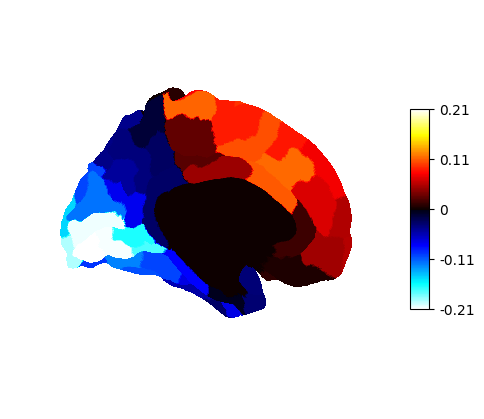

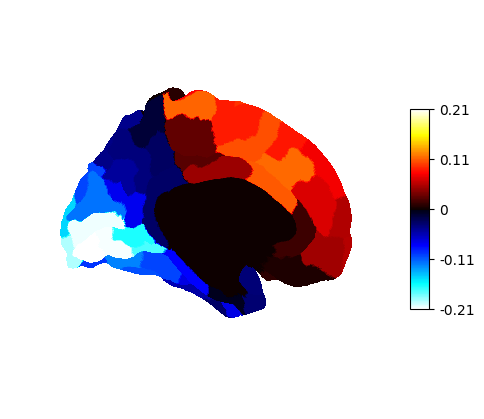

In [110]:
import nilearn

nilearn.plotting.plot_surf_stat_map(surf_mesh='/home/bic/fmorys/neuromaps-data/atlases/fsaverage/tpl-fsaverage_den-164k_hemi-L_white.surf.gii', 
                                    stat_map='/dagher/dagher11/filip/Obesity_maps/data/component2.gii', 
                                    hemi='left',
                                    view=('medial'))